In [1]:
from datascience import *

from matplotlib import pyplot as plots
from IPython.display import HTML

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


%matplotlib inline

%load_ext autoreload
%autoreload 2



In [2]:
penguins = Table().read_table('../../lectures/data/penguins.csv')

In [3]:
penguins

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
Adelie,Torgersen,39.1,18.7,181,3750,MALE
Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
Adelie,Torgersen,40.3,18,195,3250,FEMALE
Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
Adelie,Torgersen,39.3,20.6,190,3650,MALE
Adelie,Torgersen,38.9,17.8,181,3625,FEMALE
Adelie,Torgersen,39.2,19.6,195,4675,MALE
Adelie,Torgersen,34.1,18.1,193,3475,UNKNOWN
Adelie,Torgersen,42,20.2,190,4250,UNKNOWN
Adelie,Torgersen,37.8,17.1,186,3300,UNKNOWN


In [4]:
import numpy as np
np.round([1.00000000999999999], 10)

array([1.00000001])

In [5]:
import seaborn
seaborn.set_theme(context='talk', rc={ 'axes.labelsize': 'large', 'font.size': 14.0 })

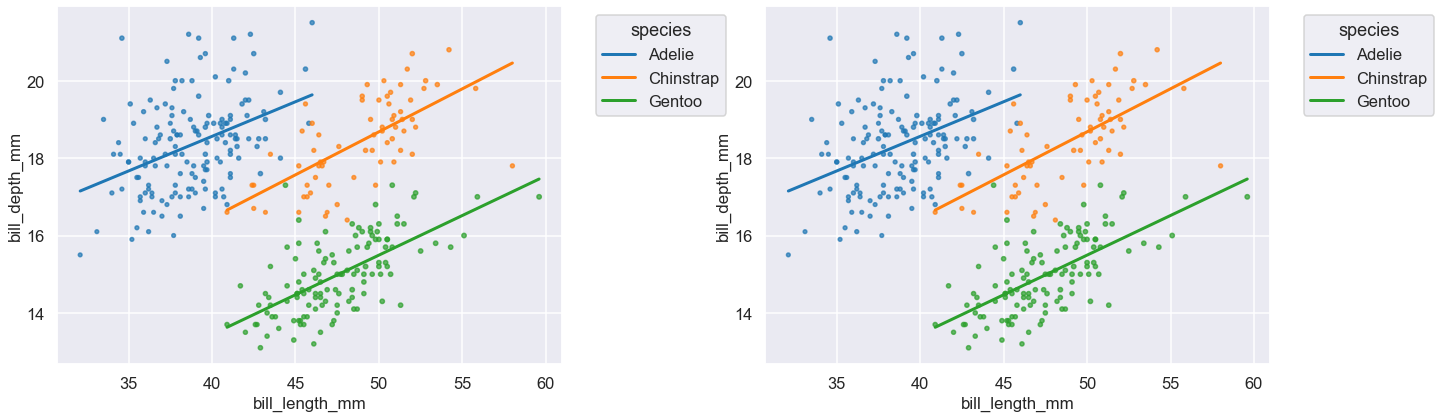

In [6]:
fig,ax = plots.subplots(1,2,figsize=(18,6))

penguins.scatter(    "bill_length_mm", "bill_depth_mm", 
    group="species", 
    sizes='body_mass_g',
    height=8, width=6,
    s=10,
    fit_line=True,
    ax=ax[0]
)
plots.tight_layout(rect=[0, 0, 0.8, 1])


penguins.scatter(    "bill_length_mm", "bill_depth_mm", 
    group="species", 
    sizes='body_mass_g',
    height=6, width=6,
    s=10,
    fit_line=True,
    ax=ax[1]
)

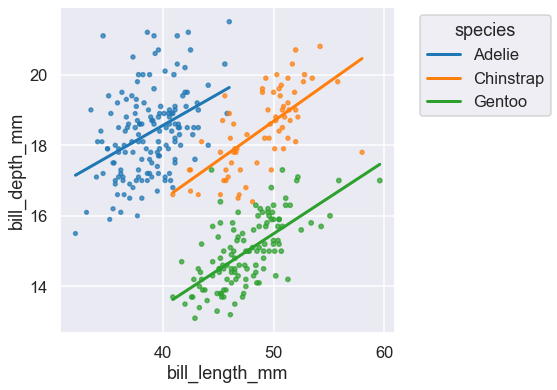

In [7]:
penguins.scatter(    "bill_length_mm", "bill_depth_mm", 
    group="species", 
    sizes='body_mass_g',
    height=6, width=6,
    s=10,
    fit_line=True,
)

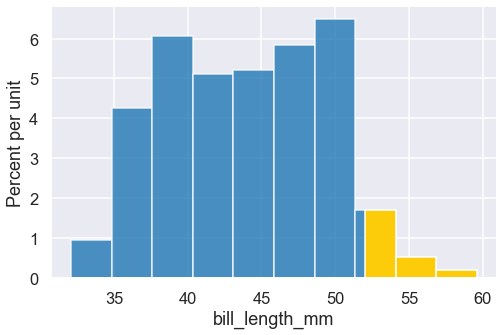

In [8]:
# plots.style.use('fivethirtyeight')
penguins.hist("bill_length_mm",  width=8, height=5, left_end=52)

ValueError: Unrecognized marker style 'square'

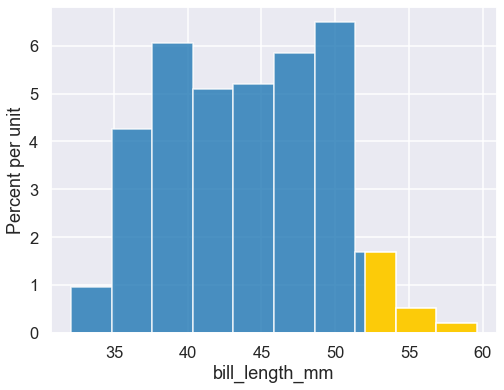

In [26]:
# plots.style.use('fivethirtyeight')
fig,ax = plots.subplots(figsize=(8,6))
seaborn.set_theme(context='talk', rc={ 'axes.labelsize': 'large', 'font.size': 14.0 })
penguins.hist("bill_length_mm",  width=8, height=5, left_end=52, ax=ax)

Dot([45,59],(0,0),s=200,color='green',marker='s').draw(ax)

In [10]:
from matplotlib.animation import FuncAnimation
import numpy as np

In [11]:

def animate(i):
    ax.cla()
    penguins.take(np.arange(10,20+10*i)).scatter("bill_length_mm", "bill_depth_mm", 
        group="species", 
        height=6, width=6,
        sizes='body_mass_g',
        s=40,
        fit_line=True,
        ax = ax,
        xlim=(30,60),
        ylim=(12,24),
        title="Penguinos " + str(i)
    )


fig, ax = plots.subplots(figsize = (8, 6))
plots.tight_layout(pad=1.5, rect=[0, 0, 0.75, 1])
anim = FuncAnimation(fig = fig, func = animate, frames = 30, interval = 100)
video = anim.to_jshtml()
# video = anim.to_html5_video()
plots.close()
HTML(video)

/Users/freund/other/cs104/libs/datascience/datascience/tables.py:3524: RankWarning: Polyfit may be poorly conditioned
  scatter(group_data[x_label], group_data[y_labels[0]], group_data[size_label], c)


In [12]:
from matplotlib.offsetbox import AnchoredText

def gen():
    for i in np.arange(30,60):
        yield { 'left_end': i, 'right_end': i + 5 }
    
def animate(kwargs):
    ax.clear()
    penguins.hist("bill_length_mm",  width=8, height=5, ax=ax, **kwargs)
    
    t = "\n".join([ key + ': ' + str(value) for key,value in sorted(kwargs.items()) ])
    
    at = AnchoredText(t,
                       loc='lower left', prop=dict(size=15), frameon=True,
                       bbox_to_anchor=(1, 0),
                       bbox_transform=ax.transAxes
                       )
#    at2.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)



fig, ax = plots.subplots(figsize = (8, 6))
plots.tight_layout(pad=1.5, rect=[0, 0, 0.75, 1])
anim = FuncAnimation(fig = fig, func = animate, frames = gen, interval = 100)
video = anim.to_jshtml()
# video = anim.to_html5_video()
plots.close()
HTML(video)

RuntimeError: Requested MovieWriter (ffmpeg) not available

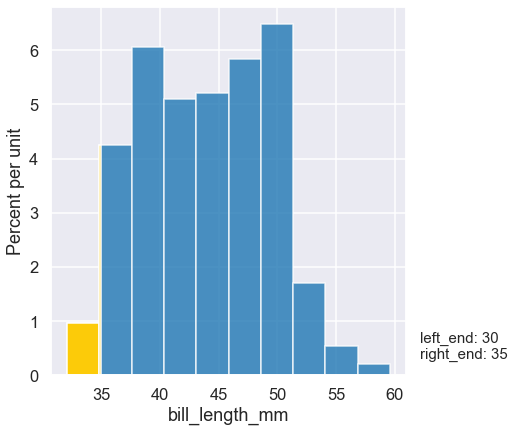

In [13]:
from matplotlib.offsetbox import AnchoredText

def gen():
    for i in np.arange(30,60):
        yield { 'left_end': i, 'right_end': i + 5 }
    
def animate(kwargs):
    ax.clear()
    penguins.hist("bill_length_mm",  width=8, height=5, ax=ax, **kwargs)
    
    t = "\n".join([ key + ': ' + str(value) for key,value in sorted(kwargs.items()) ])
    
    at = AnchoredText(t,
                       loc='lower left', prop=dict(size=15), frameon=False,
                       bbox_to_anchor=(1, 0),
                       bbox_transform=ax.transAxes
                       )
#    at2.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)



fig, ax = plots.subplots(figsize = (8, 6))
plots.tight_layout(pad=1.5, rect=[0, 0, 0.75, 1])
anim = FuncAnimation(fig = fig, func = animate, frames = gen, interval = 100)
#video = anim.to_jshtml()
video = anim.to_html5_video()
plots.close()
HTML(video)

In [ ]:

def visualize_distributions(N, sample_size, num_trials):
    """A single function to run our simulation for a given N, sample_size, and num_trials."""
    population = np.arange(1, N+1)
    
    # Builds up our outcomes table one row at a time.  We do this to ensure
    # we can apply both statistics to the same samples.
    outcomes_table = Table(["Max", "2*Mean"])
    
    for i in np.arange(num_trials):
        sample = np.random.choice(population, sample_size)
        outcomes_table.append(make_array(max(sample), 2 * np.mean(sample)))
        
    outcomes_table.hist(bins=np.arange(1, 2 * N, 10))

_ = widgets.interact(visualize_distributions, N=(100, 500, 10), 
                     sample_size=(1, 100, 1), 
                     num_trials=(10, 5000, 100))


In [ ]:

def gen():
    args = { 'N': 100, 'sample_size':10, 'num_trials':10 }
    yield args
    for i in np.arange(10,250,10):
        args['title'] = 'Change num_trials to ' + str(i)
        args['num_trials'] = i
        yield args
    for i in np.arange(100,500,10):
        args['title'] = 'Change N to ' + str(i)
        args['N'] = i
        yield args
    
fig, ax = plots.subplots(figsize = (8, 6))

def visualize_distributions(N, sample_size, num_trials, **kwargs):
    """A single function to run our simulation for a given N, sample_size, and num_trials."""
    population = np.arange(1, N+1)
    
    # Builds up our outcomes table one row at a time.  We do this to ensure
    # we can apply both statistics to the same samples.
    outcomes_table = Table(["Max", "2*Mean"])
    
    for i in np.arange(num_trials):
        sample = np.random.choice(population, sample_size)
        outcomes_table.append(make_array(max(sample), 2 * np.mean(sample)))
        
    outcomes_table.hist(bins=np.arange(1, 2 * N, 10),ax=ax)
    ax.set_xlim(0,800)
    ax.set_ylim(0,0.1)
    ax.set_xlabel('Predicted N')
    ax.set_title('Snoopy Fleet')

    
def animate(kwargs):
    ax.clear()
    visualize_distributions(**kwargs)
    
    t = "\n".join([ key + ': ' + str(value) for key,value in sorted(kwargs.items()) if key != 'title' ])
    
#     at = AnchoredText(t,
#                        loc='lower left', prop=dict(size=15), frameon=False,
#                        bbox_to_anchor=(1, 0),
#                        bbox_transform=ax.transAxes
#                        )
#     ax.add_artist(at)
#     at2 = AnchoredText(kwargs.get('title', ''),
#                        loc='upper right', prop=dict(size=18), frameon=True,
#                        )
    at2 = AnchoredText(t,
                       loc='upper right', prop=dict(size=18), frameon=True,
                       )
    ax.add_artist(at2)



plots.tight_layout(pad=1.5, rect=[0, 0, 0.75, 1])
anim = FuncAnimation(fig = fig, func = animate, frames = gen, interval = 200)
#video = anim.to_jshtml()
video = anim.to_html5_video()
plots.close()
HTML(video)

In [ ]:
get():
    def observer(change):
        kwargs = {k:v.value for k,v in controls.items()}
        show_inline_matplotlib_plots()
        with out:
            clear_output(wait=True)
            f(**kwargs)
            show_inline_matplotlib_plots()
    for k,w in controls.items():
        w.observe(observer, 'value')
    show_inline_matplotlib_plots()
    observer(None)
    return out


def animate(i):
    ax.cla()
    penguins.take(np.arange(10,20+10*i)).scatter("bill_length_mm", "bill_depth_mm", 
        group="species", 
        height=6, width=6,
        sizes='body_mass_g',
        s=40,
        fit_line=True,
        ax = ax,
        xlim=(30,60),
        ylim=(12,24),
        title="Penguinos " + str(i)
    )


fig, ax = plots.subplots(figsize = (8, 6))
plots.tight_layout(pad=1.5, rect=[0, 0, 0.75, 1])
anim = FuncAnimation(fig = fig, func = animate, frames = 30, interval = 100)
video = anim.to_jshtml()
# video = anim.to_html5_video()
plots.close()
HTML(video)

In [ ]:
cs104_style = {
    'axes.labelsize': 14.3,
    'axes.titlesize': 15.6,
    'figure.figsize': [10.4, 7.15],
    'grid.linewidth': 1.3,
    'legend.fontsize': 13.0,
    'lines.linewidth': 2.275,
    'lines.markeredgewidth': 0.0,
    'lines.markersize': 9.1,
    'patch.linewidth': 0.39,
    'xtick.labelsize': 13.0,
    'xtick.major.pad': 9.1,
    'xtick.major.width': 1.3,
    'xtick.minor.width': 0.65,
    'ytick.labelsize': 13.0,
    'ytick.major.pad': 9.1,
    'ytick.major.width': 1.3,
    'ytick.minor.width': 0.65
}

In [ ]:
plots.style.library

In [ ]:
fig,ax = plots.subplots(figsize=(8,6))
print(ax.properties().keys())